# **PW Skills Assignment: Data Analytitcs: EDA**

## **EDA - 1**

### **Title: Bike Details Dataset**

**Source: **

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.

**Description: **

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for resale value prediction, market analysis, and understanding buyer preferences.

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.


### **Title: Bike Details Dataset**

* =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")

* selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000) year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)

* seller_type: Seller category, either "Individual" or "Dealer" (Categorical) owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)

* km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)

* ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.)

# **Questions:**

In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is CSV
df = pd.read_csv('BIKE DETAILS.csv')
df.head()



Saving BIKE DETAILS.csv to BIKE DETAILS.csv


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [35]:
# Basic Data Checks

# Shape and types
df.shape
df.info()

# Null values
df.isnull().sum()

# Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [36]:
#1. What is the range of selling prices in the dataset?

price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range:", price_range)


Range: 755000


In [37]:
#2. What is the median selling price?

df['selling_price'].median()


45000.0

In [38]:
#3. What is the most common seller type?

df['seller_type'].mode()[0]


'Individual'

In [39]:
#4. How many bikes have driven more than 50,000 kilometers?

df[df['km_driven'] > 50000].shape[0]

168

In [40]:
#5. What is the average km_driven value for each ownership type?

df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32732.710240
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [41]:
#6. What proportion of bikes are from the year 2015 or older?

df[df['year'] >= 2015].shape[0] / df.shape[0]

0.5289099526066351

<Axes: title={'center': 'Missing Values per Column'}>

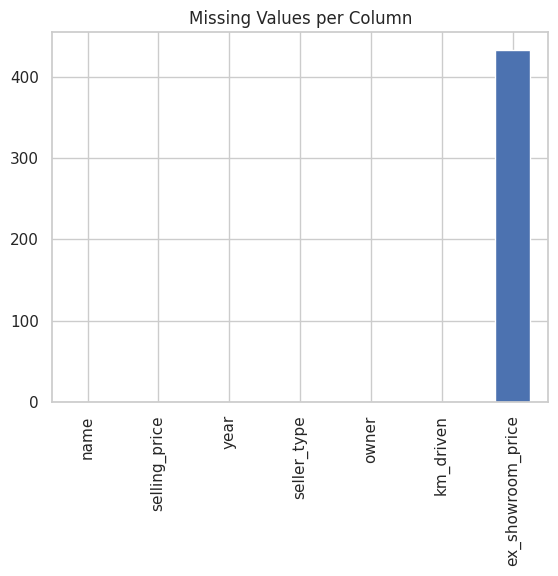

In [42]:
#7. What is the trend of missing values across the dataset?

df.isnull().sum().plot(kind='bar', title='Missing Values per Column')


In [43]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

max_price_idx = df['ex_showroom_price'].idxmax()
df.loc[max_price_idx][['name', 'ex_showroom_price']]


,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


In [44]:
#9. What is the total number of bikes listed by each seller type?

df['seller_type'].value_counts()


,count
seller_type,
Individual,1049
Dealer,6


Text(0.5, 1.0, 'Selling Price vs KM Driven (1st Owner Bikes)')

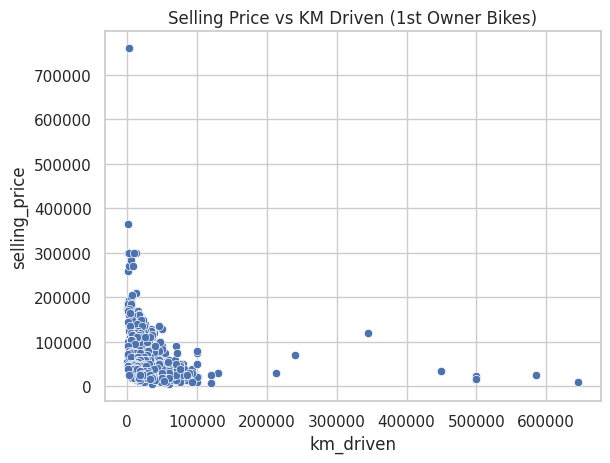

In [45]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_df = df[df['owner'].str.contains('1st', case=False)]
sns.scatterplot(data=first_owner_df, x='km_driven', y='selling_price')
plt.title("Selling Price vs KM Driven (1st Owner Bikes)")


Lower Bound: -30750.0, Upper Bound: 87250.0
Before removing outliers: 1055
After removing outliers: 1017


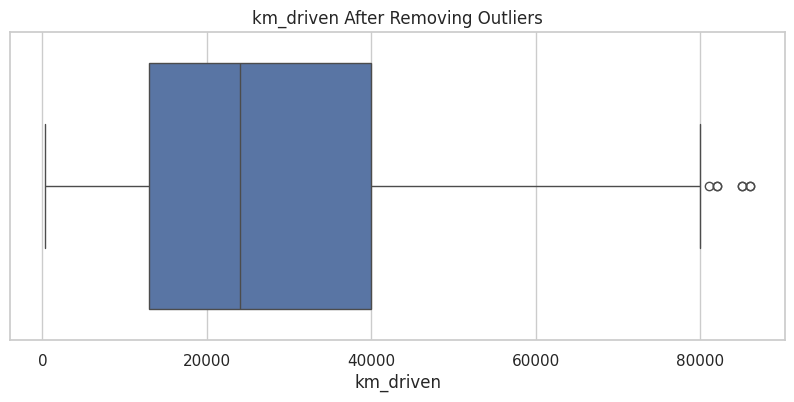

In [46]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

#Here:

#IQR bounds
#Number of rows before and after removing outliers
#A boxplot of km_driven after cleaning


Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]


print("Before removing outliers:", df.shape[0])
print("After removing outliers:", df_no_outliers.shape[0])


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_no_outliers['km_driven'])
plt.title('km_driven After Removing Outliers')
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27],
 [Text(0, 0, '1988'),
  Text(1, 0, '1991'),
  Text(2, 0, '1993'),
  Text(3, 0, '1995'),
  Text(4, 0, '1997'),
  Text(5, 0, '1998'),
  Text(6, 0, '1999'),
  Text(7, 0, '2000'),
  Text(8, 0, '2001'),
  Text(9, 0, '2002'),
  Text(10, 0, '2003'),
  Text(11, 0, '2004'),
  Text(12, 0, '2005'),
  Text(13, 0, '2006'),
  Text(14, 0, '2007'),
  Text(15, 0, '2008'),
  Text(16, 0, '2009'),
  Text(17, 0, '2010'),
  Text(18, 0, '2011'),
  Text(19, 0, '2012'),
  Text(20, 0, '2013'),
  Text(21, 0, '2014'),
  Text(22, 0, '2015'),
  Text(23, 0, '2016'),
  Text(24, 0, '2017'),
  Text(25, 0, '2018'),
  Text(26, 0, '2019'),
  Text(27, 0, '2020')])

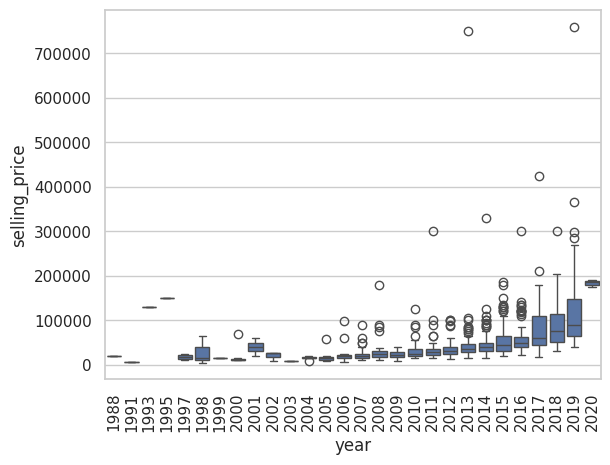

In [47]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

sns.boxplot(data=df, x='year', y='selling_price')
plt.xticks(rotation=90)

<Axes: title={'center': 'Avg Selling Price by Bike Age'}, xlabel='bike_age'>

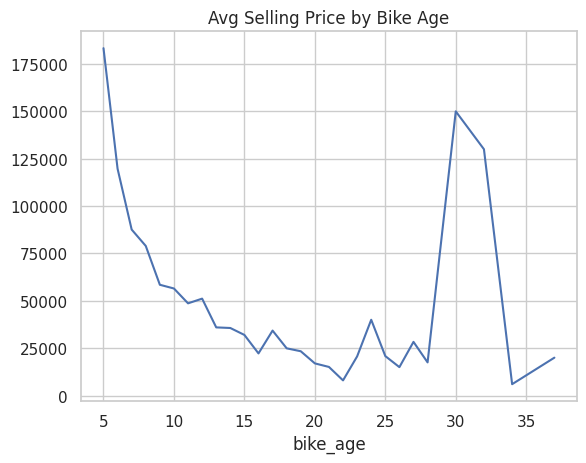

In [48]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

from datetime import datetime
current_year = datetime.now().year
df['bike_age'] = current_year - df['year']
df.groupby('bike_age')['selling_price'].mean().plot(title="Avg Selling Price by Bike Age")


In [49]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?


avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_year_price'] = df['year'].map(avg_price_by_year)
df_above_avg = df[df['selling_price'] > df['avg_year_price'] * 1.5]
df_above_avg[['name', 'year', 'selling_price']]


,name,year,selling_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
18,Royal Enfield Classic Gunmetal Grey,2018,150000
23,Jawa Standard,2019,180000
...,...,...,...
979,Royal Enfield Thunder 500,2015,105000
981,Royal Enfield Thunder 350,2013,105000
983,Royal Enfield Classic 350,2015,100000
984,Royal Enfield Classic 500,2014,95000


<Axes: >

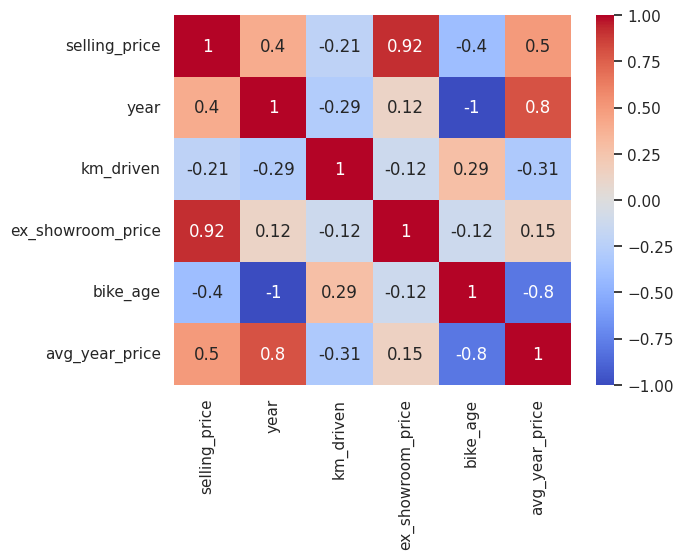

In [50]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


# **EDA - 2**

### **Title: Car Sale Dataset**

**Source:**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences.

**Features:**

* Car_id: A unique identifier for each car in the dataset, helping to track individual car entries

* Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD

* Customer Name: The name of the customer who purchased the car, represented as a string

* Gender: The gender of the customer, categorized as "Male" or "Female. Annual
* Income: The customer's annual income in US dollars, represented as a numeric value

* Dealer_Name: The name of the dealership selling the car, represented as a string

* Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc

* Model: The specific model name of the car, such as "Corolla," "Civic," etc

* Engine: The engine type of the car, such as "V6," "I4," etc

* Price ($): The selling price of the car in US dollars Transmission: The type of transmission in the car, either "Manual" or "Automatic.

* Color: The color of the car, represented as a string (e.g., "Red," "Blue")

* Dealer_No: A unique identifier for each car dealer in the dataset Body Style: The body style of the car, such as "Sedan," "SUV," etc

* Phone: The phone number of the customer who purchased the car Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

### **Questions: **

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Car Sale.csv')
df.head()



Saving Car Sale.csv to Car Sale.csv


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [52]:
#Basic Data Understanding

df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


np.int64(0)

In [53]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


In [54]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_std = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
price_std


,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


<Axes: xlabel='Transmission', ylabel='Price ($)'>

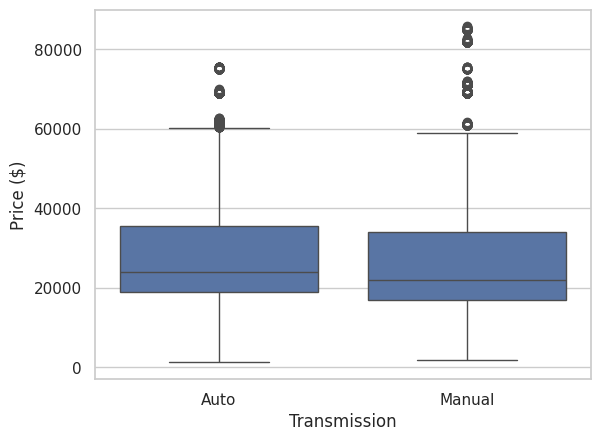

In [55]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

sns.boxplot(data=df, x='Transmission', y='Price ($)')


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

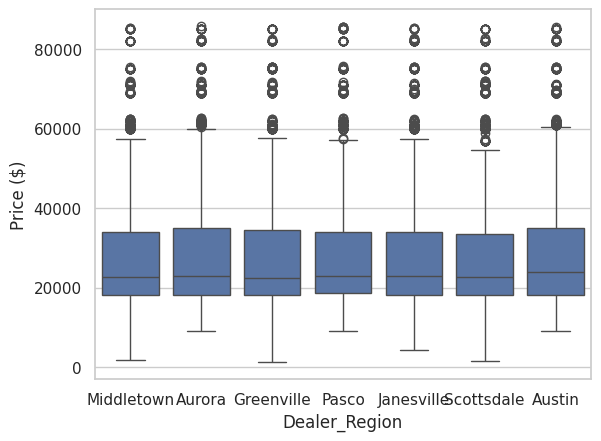

In [56]:
#4. What is the distribution of car prices across different regions?

sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')


<Axes: xlabel='Body Style', ylabel='count'>

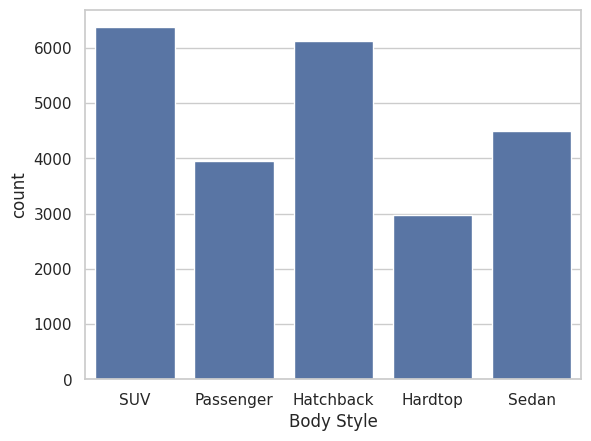

In [57]:
#5. What is the distribution of cars based on body styles?

sns.countplot(data=df, x='Body Style')


,Annual Income
Gender,
Female,755973.021339
Male,851184.044207


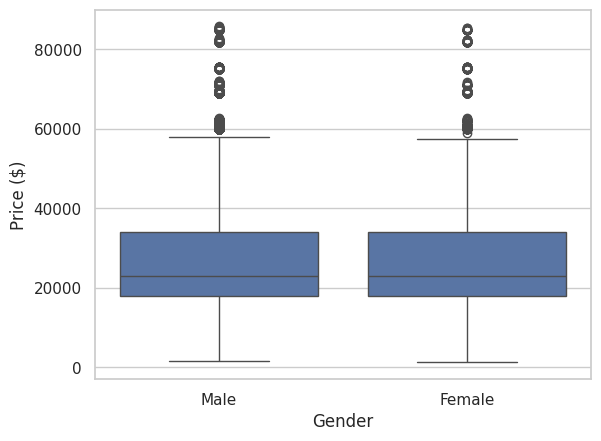

In [58]:
#6. How does the average selling price of cars vary by customer gender and annual income?

sns.boxplot(data=df, x='Gender', y='Price ($)')
df.groupby('Gender')['Annual Income'].mean()

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


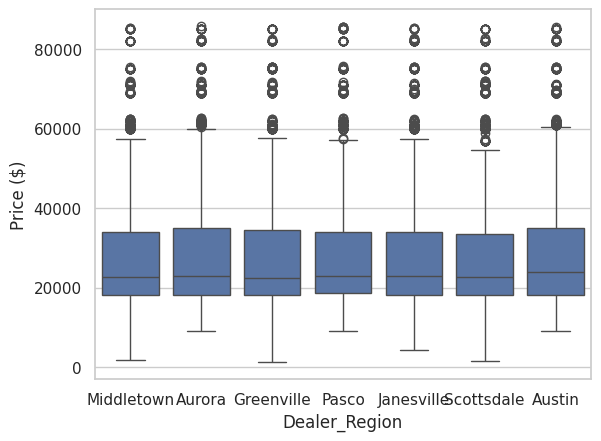

In [59]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

sns.boxplot(data=df, x='Dealer_Region', y='Price ($)')
df['Dealer_Region'].value_counts()


In [60]:
#8. How does the average car price differ between cars with different engine sizes?

df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)


,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Average Car Price by Annual Income Bracket:
Annual Income
(-1109.92, 2248064.0]      28044.351311
(2248064.0, 4486048.0]     29211.227862
(4486048.0, 6724032.0]     27736.745763
(6724032.0, 8962016.0]     40333.333333
(8962016.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


<Axes: title={'center': 'Average Car Price by Income Bracket'}, xlabel='Annual Income', ylabel='Price ($)'>

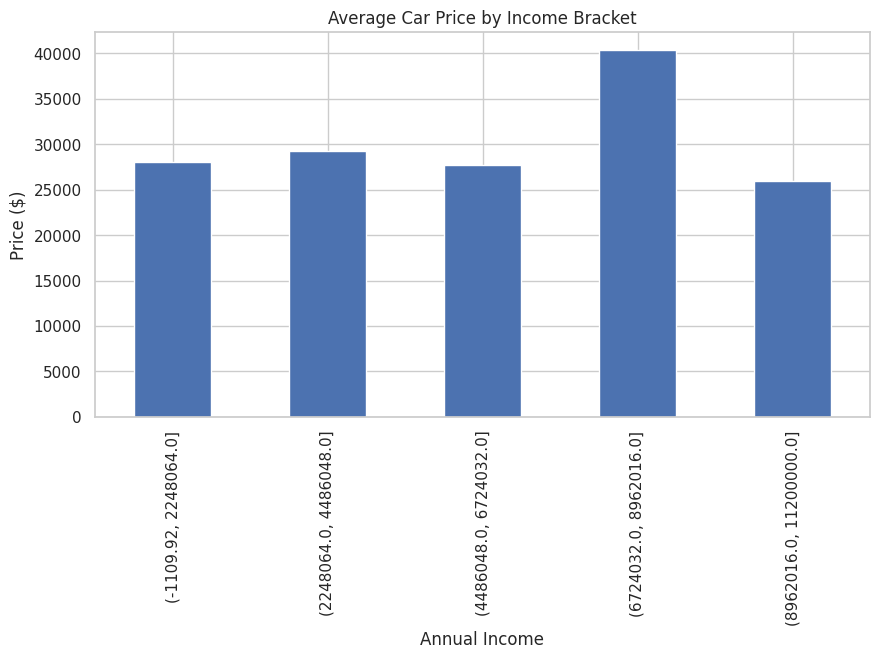

In [61]:
#9. How do car prices vary based on the customer’s annual income bracket?


income_bins = pd.cut(df['Annual Income'], bins=5)


price_by_income = df.groupby(income_bins, observed=True)['Price ($)'].mean()


print("Average Car Price by Annual Income Bracket:")
print(price_by_income)


price_by_income.plot(kind='bar', figsize=(10, 5), title='Average Car Price by Income Bracket', ylabel='Price ($)')


<Axes: xlabel='Model', ylabel='Price ($)'>

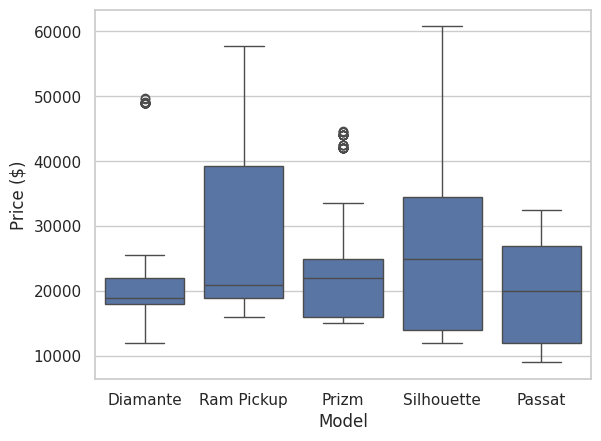

In [62]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_models = df['Model'].value_counts().head(5).index
sns.boxplot(data=df[df['Model'].isin(top_models)], x='Model', y='Price ($)')


<Axes: xlabel='Color', ylabel='Price ($)'>

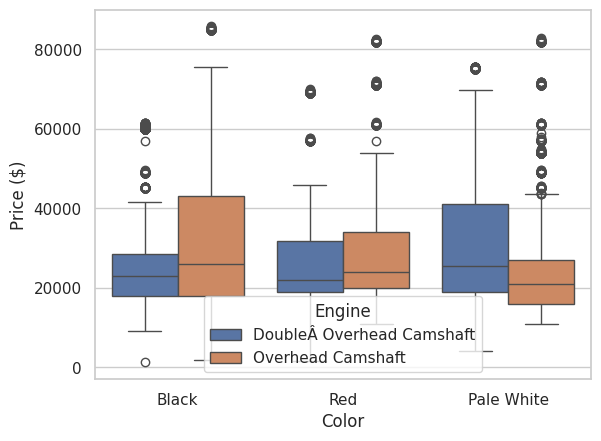

In [63]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

sns.boxplot(data=df, x='Color', y='Price ($)', hue='Engine')


<Axes: xlabel='Month', ylabel='count'>

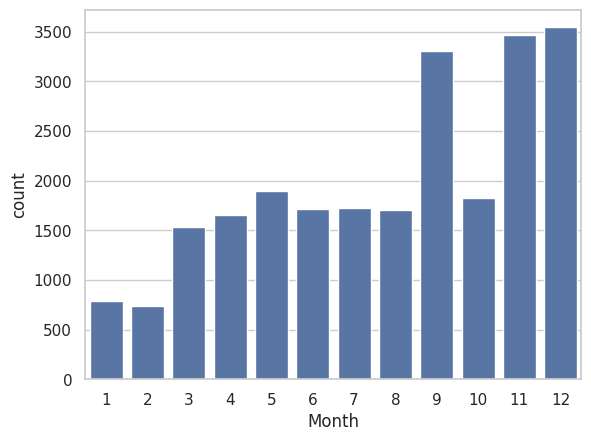

In [64]:
#12. Is there any seasonal trend in car sales based on the date of sale?

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
sns.countplot(data=df, x='Month')


<Axes: xlabel='Body Style', ylabel='Price ($)'>

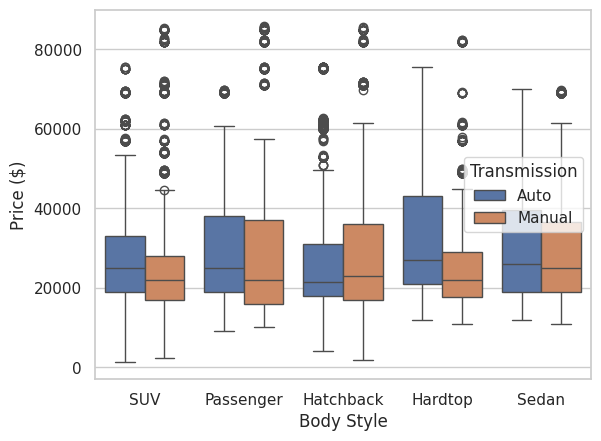

In [65]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?

sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')


<Axes: >

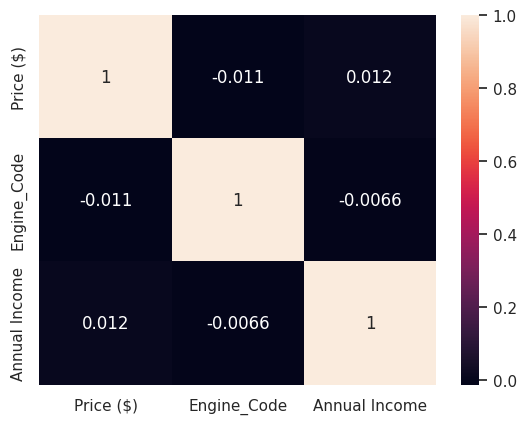

In [66]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# Convert categorical engine values to numeric codes if needed
df['Engine_Code'] = df['Engine'].astype('category').cat.codes

sns.heatmap(df[['Price ($)', 'Engine_Code', 'Annual Income']].corr(), annot=True)


In [67]:
#15. How does the average car price vary across different car models and engine types?

df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False).head(10)


,,Price ($)
Model,Engine,
SC,Overhead Camshaft,61074.818182
Ranger,DoubleÂ Overhead Camshaft,61064.055556
Sable,Overhead Camshaft,61039.770833
Catera,DoubleÂ Overhead Camshaft,56836.933333
LX470,Overhead Camshaft,54037.490196
LS400,Overhead Camshaft,53157.941558
GS400,Overhead Camshaft,53086.000000
Tacoma,DoubleÂ Overhead Camshaft,53085.821918
Aurora,Overhead Camshaft,51833.556962


# **EDA - 3**

### **Title - Amazon Sales Data**

**Description: **

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Features: **

* product_id: Unique identifier for each product
* product_name: Name of the product
* category: Category of the product
* discounted_price: Discounted price of the product actual_price: Actual price of the product
* discount_percentage: Percentage of discount for the product
* rating: Rating of the product (1-5)
* rating_count: Number of people who voted for the Amazon rating
* about_product: Description about the product
* user_id: ID of the user who wrote the review
* user_name: Name of the user who wrote the review
* review_id: ID of the user review
* review_title: Short review
* review_content: Long review
* img_link: Image link of the product
* product_link: Official website link of the product

## **Questions**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('amazon.csv')
df.head()



Saving amazon.csv to amazon (2).csv


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [69]:
#Basic Data Inspection

df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

np.int64(0)

In [70]:
#1. What is the average rating for each product category?

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df.groupby('category')['rating'].mean()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


In [71]:
#2. What are the top rating_count products by category?

top_products = df.sort_values('rating_count', ascending=False).groupby('category').head(1)
top_products[['category', 'product_name', 'rating_count']]


,category,product_name,rating_count
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992
750,Electronics|GeneralPurposeBatteries&BatteryCha...,Eveready Red 1012 AAA Batteries - Pack of 10,989
977,"Electronics|Headphones,Earbuds&Accessories|Hea...",Sennheiser CX 80S in-Ear Wired Headphones with...,"98,250"
1059,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976
151,Computers&Accessories|Accessories&Peripherals|...,Zoul USB Type C Fast Charging 3A Nylon Braided...,974
...,...,...,...
895,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,Classmate Octane Colour Burst-Multicolour Gel ...,"10,718"
941,"Computers&Accessories|Printers,Inks&Accessorie...","RC PRINT GI 790 Ink Refill for Canon G1000, G1...","1,367"
526,Electronics|Mobiles&Accessories|MobileAccessor...,WeCool B1 Mobile Holder for Bikes or Bike Mobi...,"1,193"
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118"


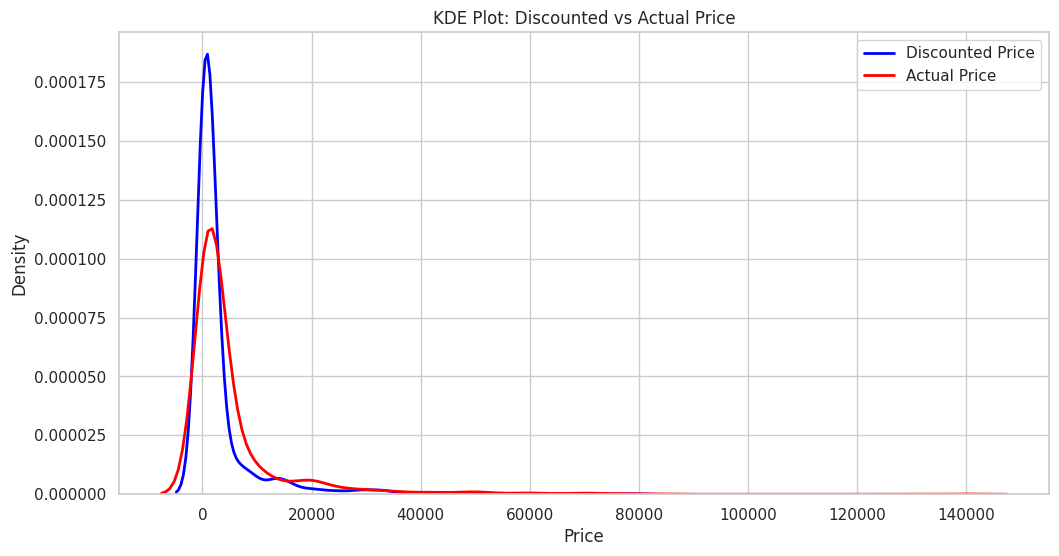

In [72]:
#3. What is the distribution of discounted prices vs. actual prices?

# Remove any commas or currency symbols (if present), then convert to float
df['discounted_price'] = pd.to_numeric(df['discounted_price'].astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')

df_clean = df[['discounted_price', 'actual_price']].dropna()

plt.figure(figsize=(12, 6))
sns.kdeplot(df_clean['discounted_price'], label='Discounted Price', color='blue', linewidth=2)
sns.kdeplot(df_clean['actual_price'], label='Actual Price', color='red', linewidth=2)
plt.title('KDE Plot: Discounted vs Actual Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


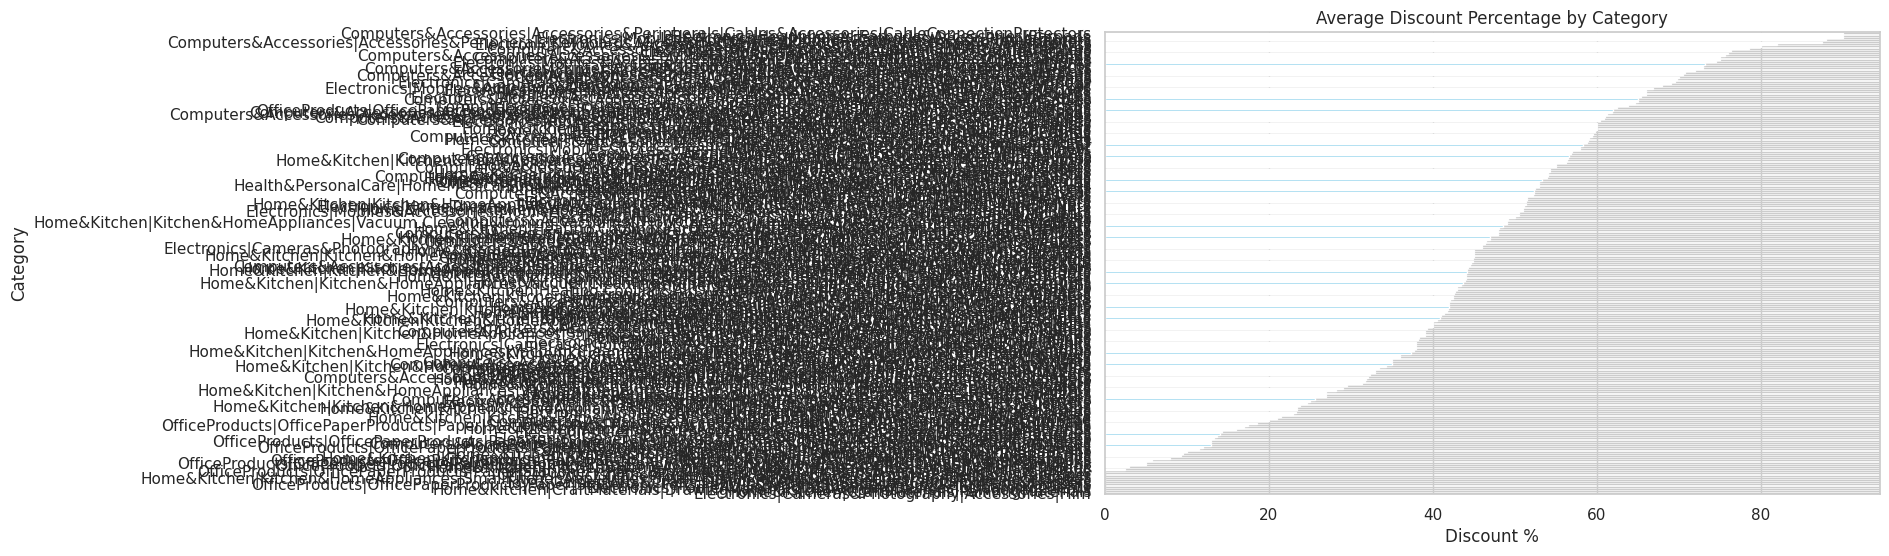

In [73]:
#4. How does the average discount percentage vary across categories.


# Remove '%' and convert to float
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

df.groupby('category')['discount_percentage'].mean().sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Average Discount Percentage by Category')
plt.xlabel('Discount %')
plt.ylabel('Category')
plt.grid(True)
plt.show()


In [74]:
#5. What are the most popular product names?

df['product_name'].value_counts().head(10)


,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


In [75]:
#6. What are the most popular product keywords?

from collections import Counter
import re

words = ' '.join(df['product_name'].dropna()).lower()
words = re.findall(r'\b\w+\b', words)
common_words = Counter(words).most_common(20)
common_words


[('with', 752),
 ('for', 674),
 ('black', 530),
 ('usb', 417),
 ('cable', 414),
 ('1', 413),
 ('and', 331),
 ('c', 289),
 ('3', 275),
 ('2', 267),
 ('charging', 247),
 ('type', 243),
 ('to', 219),
 ('fast', 212),
 ('in', 178),
 ('smart', 175),
 ('white', 170),
 ('tv', 152),
 ('compatible', 146),
 ('5', 137)]

In [76]:
#7. What are the most popular product review?

df['review_title'].value_counts().head(10)


,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"Above average phone,Worth For The Money 💰,Okie,Phone is excellent,Purchased in good budget at 12k,It can fulfill basic needs in affordable price range,Nice,About features",6
"Fake Product,Costly but excellent quality,Storage good but don't know how to Activate warantee??,Good for use,5 stas nahi diya kyuki capacity 477gb hi rahta hai,Speed not as advertise,Good one,It's ok",6
"The metal pin is losing it's strength,Sahi h bs 44 rupe ki and dilivery charge 40,Good Charging cable,Good sturdy micro usb cable with good charging speeds,Cheapest micro USB cable in the market,boat is better than this,I bought this for 199rs best charging cable for all mobiles,Good",5
"GOOD,Thank you Amazon very good charging cable,Good,Very good product,good quality,Very Good Product,This is fast charging USB!,Simply perfect at the price of below 100",5


<Axes: >

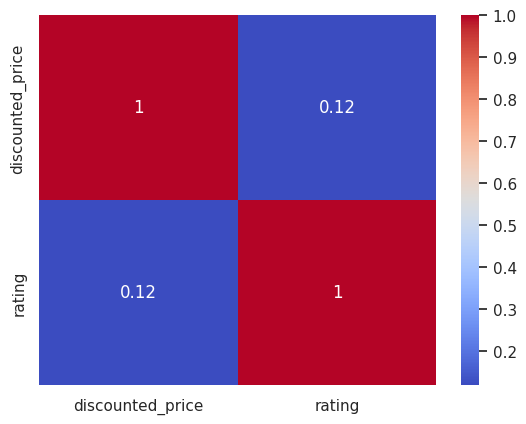

In [77]:
#8. What is the correlation between discounted_price and rating?

corr = df[['discounted_price', 'rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [78]:
#9. What are the Top 5 categories based on the highest ratings?

top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
top_categories


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


In [79]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

#Potential Areas for Improvement or Optimization

#1. Products with Low Ratings but High Prices

df[df['rating'] <= 2][['product_name', 'actual_price', 'rating']].sort_values(by='actual_price', ascending=False)

#2. High Discount, Low Rating Products

df[(df['discount_percentage'] > 50) & (df['rating'] < 3)][['product_name', 'discount_percentage', 'rating']]

#3. Popular Categories with Low Ratings

df.groupby('category')['rating'].mean().sort_values()


#4. Products Without Reviews or Ratings

df[df['rating_count'] == 0][['product_name', 'category']].head()

#5. Low Sales Despite High Ratings

# Convert rating_count to numeric, coercing errors to NaN
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


df[(df['rating'] >= 4.5) & (df['rating_count'] < 10)].sort_values(by='rating', ascending=False)


#6. Price Mismatch: Very Small Discounts

df[df['discount_percentage'] < 5][['product_name', 'actual_price', 'discounted_price']]


#7. Improve Low-Rated Top Sellers

top_rated = df.sort_values(by='rating_count', ascending=False).head(20)
top_rated[top_rated['rating'] < 3.5]



,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
82,B08QX1CC14,SKYWALL 81.28 cm (32 inches) HD Ready Smart LE...,"Electronics|HomeTheater,TV&Video|Televisions|S...",7299.0,19125.0,62.0,3.4,902.0,Resolution: Full HD (1920 x 1080) | Refresh Ra...,"AFZBEV4BOWGRSEH2PK7D65ZW66PA,AFXQ3YGENWMRX36NX...","Naresh Patel,Bhaskar Reddy,Vipin Thakur,Ramdas...","R3MHRRK05RD01A,R14A3U8XTK1D7X,R1F10MFQBXZA8W,R...","Good in this price,Speakers and sound next lev...",Overall experience in this price is good.You c...,https://m.media-amazon.com/images/I/41M9BBMSUd...,https://www.amazon.in/Skywall-81-28-inches-Sma...


## **EDA - 4**

### **Description of the Dataset: **

**The dataset titled "Spotify Data: **

Popular Hip-hop Artists and Tracks" provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.

### **Application in Data Science: **

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

### **Column Descriptors: **

* Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

* Track Name: The title of the track, encapsulating its identity and essence.

* Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

* Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

* Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration

## **Questions**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


from google.colab import files
uploaded = files.upload()

df = pd.read_csv('spotify.csv')  # adjust filename if needed
df.head()




Saving spotify.csv to spotify (1).csv


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [81]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

# Check nulls
print(df.isnull().sum())

# Drop rows with null values (if any)
df.dropna(inplace=True)

# Check and drop duplicates
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicates: 27


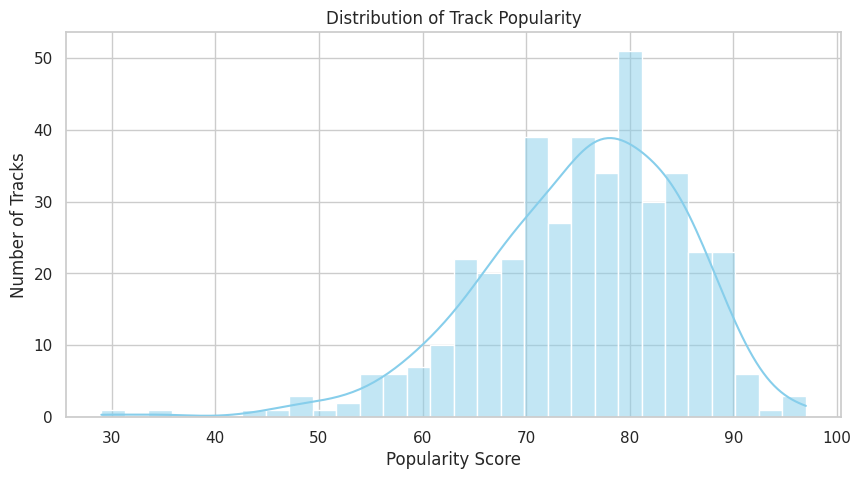

In [82]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.show()


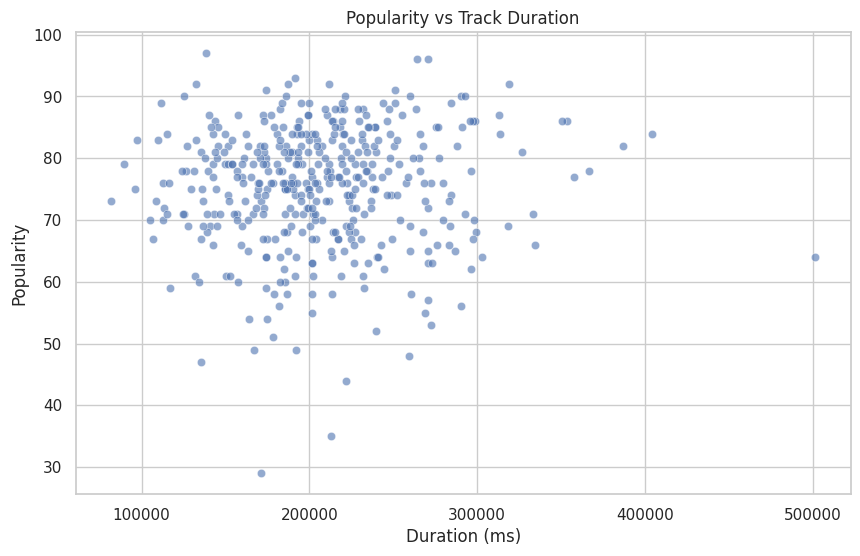

In [83]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', alpha=0.6)
plt.title('Popularity vs Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


<ipython-input-84-866c998951a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


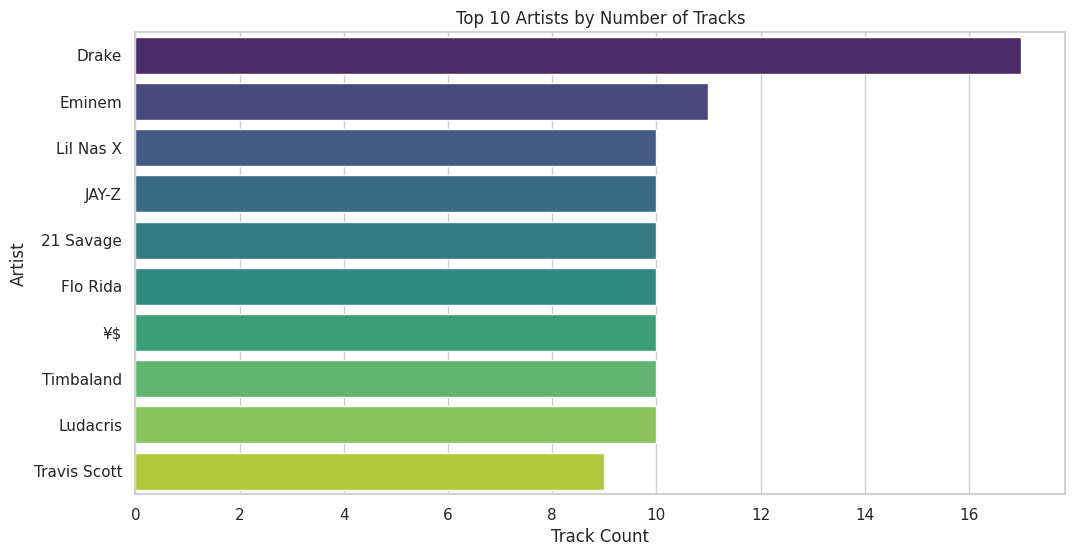

In [84]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

top_artists = df['Artist'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()


In [85]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

df.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [86]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5_artists = df['Artist'].value_counts().head(5).index
avg_pop = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
avg_pop


,Popularity
Artist,
21 Savage,83.800000
Eminem,83.636364
Drake,82.882353
JAY-Z,77.900000
Lil Nas X,75.900000


In [87]:
#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top_tracks = df[df['Artist'].isin(top_5_artists)]
top_tracks = top_tracks.sort_values(['Artist', 'Popularity'], ascending=[True, False])
top_tracks.groupby('Artist').first()[['Track Name', 'Popularity']]


,Track Name,Popularity
Artist,,
21 Savage,redrum,96
Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
Eminem,Without Me,90
JAY-Z,Ni**as In Paris,86
Lil Nas X,THATS WHAT I WANT,81


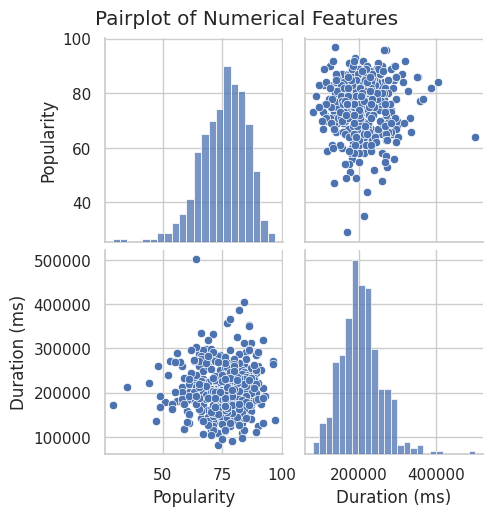

In [88]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


<ipython-input-89-863c04637d9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_artist_subset, x='Artist', y='Duration (ms)', palette='Set2')


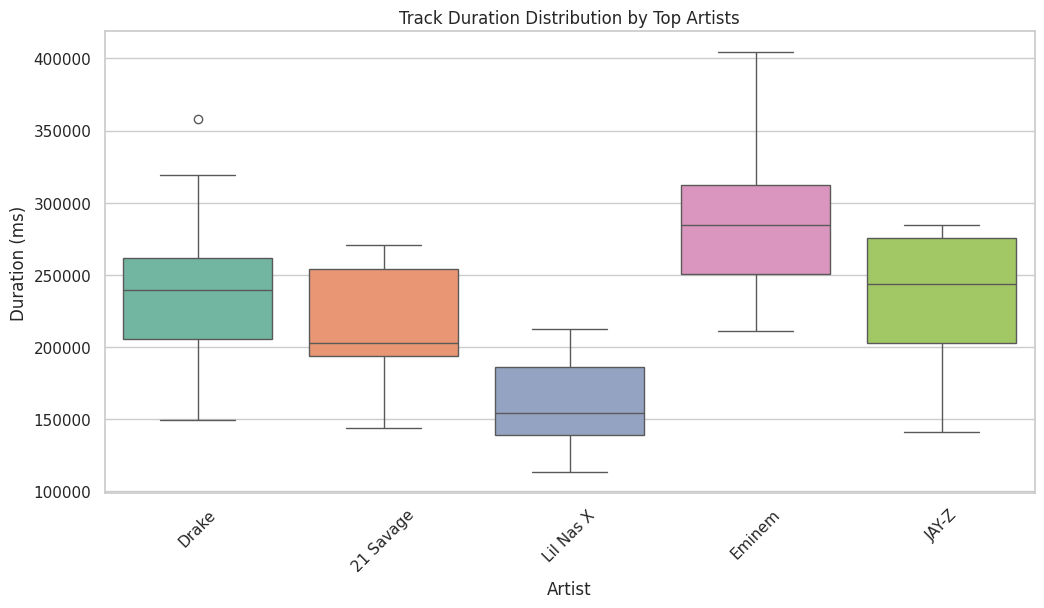

In [89]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

top_artist_subset = df[df['Artist'].isin(top_5_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_artist_subset, x='Artist', y='Duration (ms)', palette='Set2')
plt.title('Track Duration Distribution by Top Artists')
plt.xticks(rotation=45)
plt.show()


<ipython-input-90-59e5b1eb6c9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_artist_subset, x='Artist', y='Popularity', inner='quartile', palette='muted')


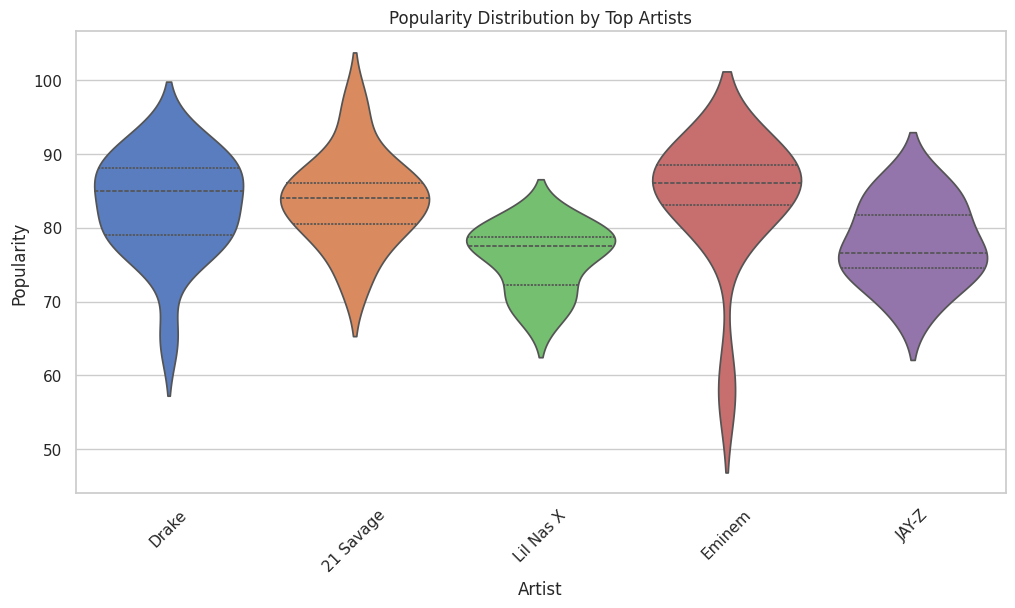

In [90]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12, 6))
sns.violinplot(data=top_artist_subset, x='Artist', y='Popularity', inner='quartile', palette='muted')
plt.title('Popularity Distribution by Top Artists')
plt.xticks(rotation=45)
plt.show()
